In [66]:
import pandas as pd
import pickle
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

import statsmodels.api as sm

In [67]:
with open("data/movie_data_smooth.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [68]:
print("The shape of the DataFrame is:", df.shape)
df.head()

The shape of the DataFrame is: (3019, 13)


,Genre,Language,Nudity,Rating,Sex,Title,Violence,Release_Date,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_Year,Release_Month
0,Action,Medium,Light,PG-13,None,Skyscraper,Medium,2018-07-13,125000000,31562840,71955649,2018,Jul
1,Animated,None,Light,PG,None,Hotel Transylvania 3: Summer Vacation,Light,2018-07-13,65000000,57597439,112373051,2018,Jul
2,Thriller,Heavy,Medium,R,Medium,The First Purge,Heavy,2018-07-04,13000000,52929930,76023230,2018,Jul
3,Science Fiction,Heavy,Light,PG-13,None,Ant-Man And The Wasp,Medium,2018-07-06,130000000,142156135,293129020,2018,Jul
4,Thriller,Heavy,None,R,None,Sicario: Day Of The Soldado,Heavy,2018-06-29,35000000,44370869,60095029,2018,Jun


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 13 columns):
Genre                3019 non-null object
Language             3019 non-null object
Nudity               3019 non-null object
Rating               3019 non-null object
Sex                  3019 non-null object
Title                3019 non-null object
Violence             3019 non-null object
Release_Date         3019 non-null datetime64[ns]
Production_Budget    3019 non-null int64
Domestic_Gross       3019 non-null int64
Worldwide_Gross      3019 non-null int64
Release_Year         3019 non-null int64
Release_Month        3019 non-null object
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 306.7+ KB


In [84]:
df.describe()

,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_Year
count,3.019000e+03,3.019000e+03,3.019000e+03,3019.000000
mean,3.998957e+07,5.317473e+07,1.178972e+08,2006.159656
std,4.533945e+07,7.425555e+07,1.963899e+08,8.854711
min,1.100000e+03,0.000000e+00,0.000000e+00,1933.000000
25%,1.000000e+07,7.784598e+06,1.283477e+07,2001.000000
50%,2.500000e+07,2.842675e+07,4.766601e+07,2007.000000
75%,5.200000e+07,6.647570e+07,1.341739e+08,2012.000000
max,4.250000e+08,7.605076e+08,2.776345e+09,2019.000000


<BarContainer object of 63 artists>

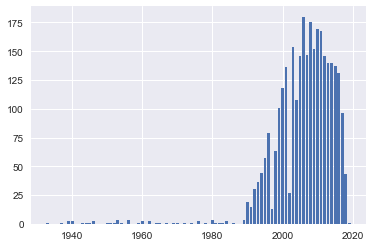

In [87]:
height = (df.groupby('Release_Year').count().Domestic_Gross)
x = height.index

plt.bar(x, height)

I am going to drop all movies released earlier than the year 2000 to drop the years that I have fewer movies for.  This will allow me to focus on the content in more recent movies.

In [88]:
df = df[df['Release_Year'] >= 2000]
print(df.shape)
df.head()

(2514, 13)


,Genre,Language,Nudity,Rating,Sex,Title,Violence,Release_Date,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_Year,Release_Month
0,Action,Medium,Light,PG-13,None,Skyscraper,Medium,2018-07-13,125000000,31562840,71955649,2018,Jul
1,Animated,None,Light,PG,None,Hotel Transylvania 3: Summer Vacation,Light,2018-07-13,65000000,57597439,112373051,2018,Jul
2,Thriller,Heavy,Medium,R,Medium,The First Purge,Heavy,2018-07-04,13000000,52929930,76023230,2018,Jul
3,Science Fiction,Heavy,Light,PG-13,None,Ant-Man And The Wasp,Medium,2018-07-06,130000000,142156135,293129020,2018,Jul
4,Thriller,Heavy,None,R,None,Sicario: Day Of The Soldado,Heavy,2018-06-29,35000000,44370869,60095029,2018,Jun


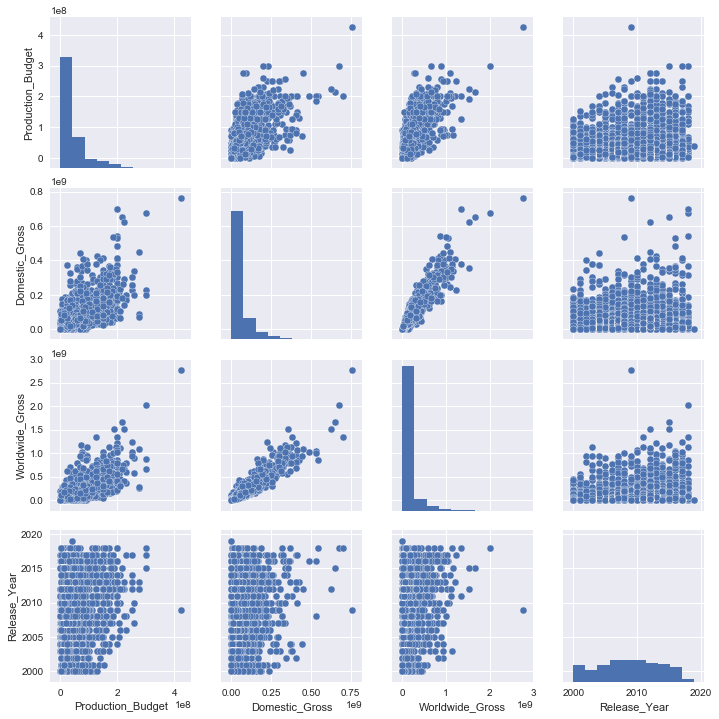

In [89]:
sns.pairplot(df)

In [90]:
df.corr()

,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_Year
Production_Budget,1.000000,0.709411,0.771318,0.114522
Domestic_Gross,0.709411,1.000000,0.938888,0.108468
Worldwide_Gross,0.771318,0.938888,1.000000,0.158678
Release_Year,0.114522,0.108468,0.158678,1.000000


/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


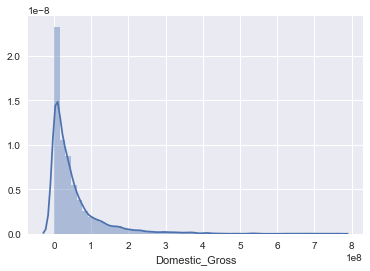

In [91]:
sns.distplot(df['Domestic_Gross'])

<BarContainer object of 20 artists>

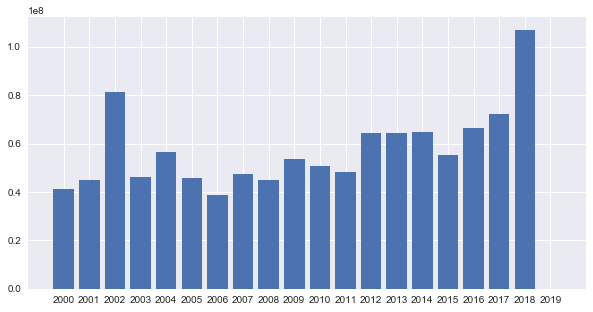

In [96]:
height = (df.groupby('Release_Year').sum().Domestic_Gross /
         df.groupby('Release_Year').count().Domestic_Gross)

x = height.index

plt.figure(figsize=(10, 5))
plt.xticks(x)
plt.bar(x, height)

<BarContainer object of 6 artists>

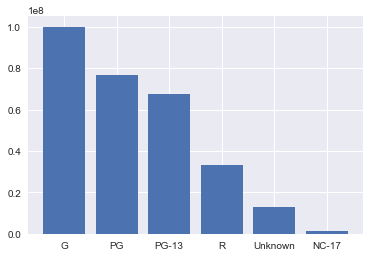

In [92]:
height = (df.groupby('Rating').sum().Domestic_Gross /
         df.groupby('Rating').count().Domestic_Gross)
height.sort_values(ascending=False, inplace=True)
x = height.index

plt.bar(x, height)

Fantasy Animated Family Science Fiction Religious Action Musical Historical Comedy Romance Mystery Thriller Western Horror Soap Opera Unknown Biography Drama Documentary


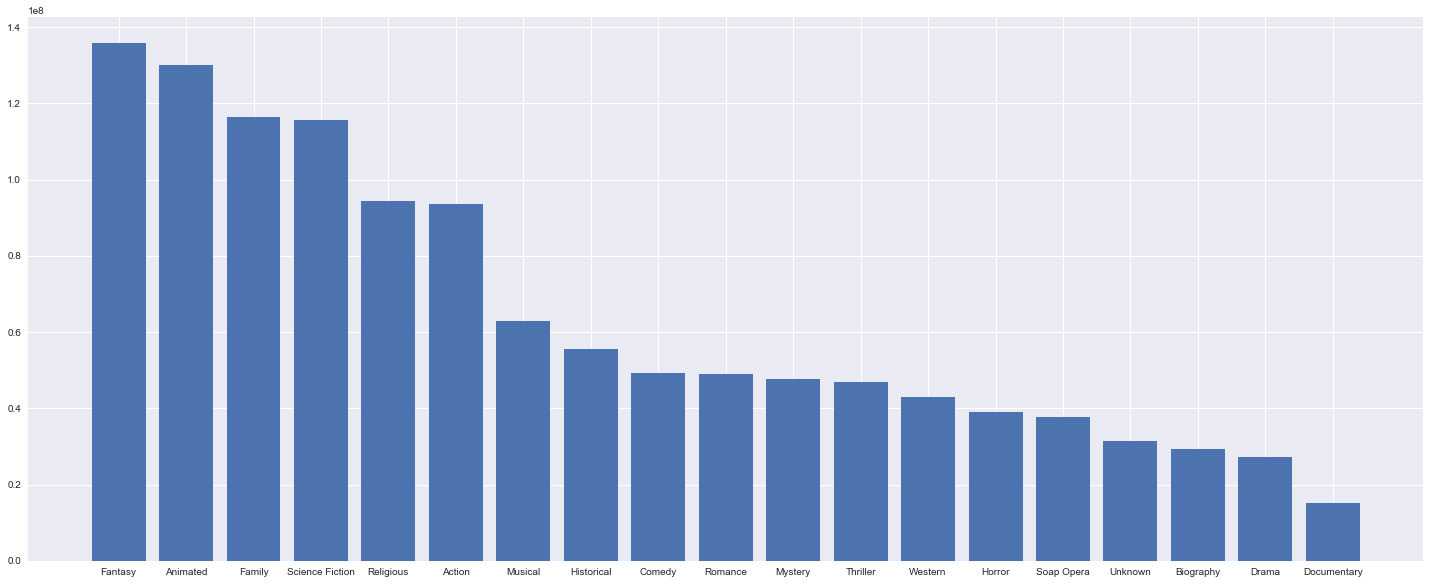

In [93]:
height = (df.groupby('Genre').sum().Domestic_Gross /
 df.groupby('Genre').count().Domestic_Gross)
height.sort_values(ascending=False, inplace=True)
x = height.index

plt.figure(figsize=(25, 10))
plt.bar(x, height)
print(' '.join(x))

In [98]:
df.to_csv('data/df_model.csv', index=False)